# Loading & Analysis of News Aggregator Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
import tensorflow as tf

# keras: for data processing
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

# keras: for Deep-learing
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.activations import *
from tensorflow.keras.backend import *
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import *

Using TensorFlow backend.


In [2]:
np.random.seed(41)

- Data load

In [3]:
data = pd.read_csv('./data/uci_news_aggregator.csv', delimiter = ',', skiprows = 1,
                   names = ['ID', 'TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY',
                            'HOSTNAME', 'TIMESTAMP'], usecols=['TITLE', 'CATEGORY'])

In [4]:
data = data.reindex(np.random.permutation(data.index))

In [5]:
data.head(20)

,TITLE,CATEGORY
51683,"Cloud first, mobile first: Word, Powerpoint, a...",b
364094,This Is How a 'Go-Around' Avoids Disaster at a...,b
220239,Insider Source: Apple and Samsung Renew Settle...,t
15418,States Asks Big Retail to Halt Tobacco Sales,m
162428,FDA Proposes New Regulations on E-Cigarettes,m
346459,"Paul Mazursky, director of Bob & Carol & Ted &...",e
60046,BlackBerry CEO trying to improve relationships...,b
331513,"Android 5.0 Lollipop Is Sealed, No Touchwiz, S...",t
7953,Blood test for Alzheimer's risk could be a bre...,m
78829,Celebrate the return of 'Game of Thrones' with...,e


In [6]:
data.shape

(422419, 2)

- Value count

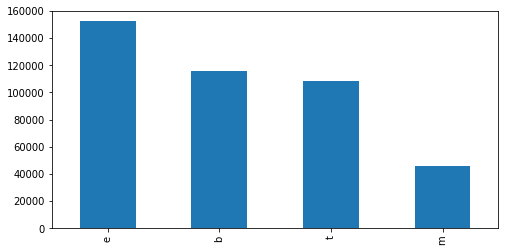

In [7]:
data.CATEGORY.value_counts().plot(kind='bar', grid=False, figsize=(8, 4))

In [8]:
data.CATEGORY.value_counts()

e    152469
b    115967
t    108344
m     45639
Name: CATEGORY, dtype: int64

- Construct label

In [9]:
e = data[data['CATEGORY'] == 'e']#[:num_of_categories]
b = data[data['CATEGORY'] == 'b']#[:num_of_categories]
t = data[data['CATEGORY'] == 't']#[:num_of_categories]
m = data[data['CATEGORY'] == 'm']#[:num_of_categories]

concated = pd.concat([e,b,t,m], ignore_index=True)

In [10]:
concated

,TITLE,CATEGORY
0,"Paul Mazursky, director of Bob & Carol & Ted &...",e
1,Celebrate the return of 'Game of Thrones' with...,e
2,Solange Lands Lucky Cover; Addresses Elevator ...,e
3,"Lindsay Lohan Flaunts Beach Bod, Wears Sexy Bl...",e
4,"You're The Boss: Girl Scouts, LeanIn Vow To Ba...",e
...,...,...
422414,Stroke Rounds: Pre-Hypertensives at Greater Ri...,m
422415,Melanoma Skin Cancer Cases Spike,m
422416,Winnebago County begins West Nile virus season...,m
422417,World Health Organization says 147 people have...,m


In [11]:
concated['LABEL'] = 0

In [12]:
concated.loc[concated['CATEGORY'] == 'e', 'LABEL'] = 0
concated.loc[concated['CATEGORY'] == 'b', 'LABEL'] = 1
concated.loc[concated['CATEGORY'] == 't', 'LABEL'] = 2
concated.loc[concated['CATEGORY'] == 'm', 'LABEL'] = 3

In [13]:
concated = concated.reindex(np.random.permutation(concated.index))

In [14]:
concated['LABEL'][:10]

359004    2
90474     0
392609    3
143914    0
288112    2
346156    2
358152    2
163396    1
66513     0
338916    2
Name: LABEL, dtype: int64

In [15]:
# one-hot encoding
labels = to_categorical(concated['LABEL'], num_classes=4)

In [16]:
labels[:10]

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)

# Construct Train & Test Dataset

- Embedding parameters (frequency & padding size)

In [17]:
most_common_alphabets = 80
most_common_words = 11000
char_max_len = 80
word_max_len = 80

- Character tokenizer

In [18]:
tokenizer_char = Tokenizer(num_words=most_common_alphabets, char_level=True, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)

In [19]:
tokenizer_char.fit_on_texts(concated['TITLE'].values)

In [20]:
sequences_char = tokenizer_char.texts_to_sequences(concated['TITLE'].values)

In [21]:
sequences_char[:2]

[[18,
  2,
  12,
  4,
  1,
  11,
  10,
  3,
  7,
  14,
  1,
  6,
  28,
  14,
  5,
  19,
  7,
  10,
  2,
  1,
  19,
  7,
  10,
  22,
  2,
  12,
  1,
  13,
  15,
  9,
  12,
  8,
  2,
  12,
  4,
  1,
  5,
  18,
  1,
  14,
  7,
  10,
  10,
  7,
  5,
  9,
  4,
  1,
  6,
  13,
  8,
  5,
  15,
  17,
  13,
  1,
  25,
  11,
  8,
  3,
  14,
  14,
  7,
  9,
  17,
  25],
 [11,
  13,
  8,
  7,
  4,
  6,
  7,
  9,
  2,
  1,
  14,
  11,
  23,
  7,
  2,
  1,
  8,
  2,
  30,
  5,
  7,
  9,
  4,
  1,
  18,
  10,
  2,
  2,
  6,
  21,
  5,
  5,
  12,
  1,
  14,
  3,
  11,
  26,
  1,
  9,
  24,
  1,
  3,
  14,
  2,
  8,
  7,
  11,
  3,
  1,
  6,
  5,
  15,
  8,
  1,
  4,
  2,
  6]]

- Word tokenizer

In [22]:
tokenizer_word = Tokenizer(num_words=most_common_words, char_level=False, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)

In [23]:
tokenizer_word.fit_on_texts(concated['TITLE'].values)

In [24]:
sequences_word = tokenizer_word.texts_to_sequences(concated['TITLE'].values)

In [25]:
sequences_word[:2]

[[1593, 2274, 111, 146, 2437, 4, 902, 695, 10934],
 [3454, 5039, 10733, 3611, 1232, 1821, 223, 250, 128]]

- Index

In [26]:
word_index_char = tokenizer_char.word_index

In [27]:
word_index_word = tokenizer_word.word_index

In [28]:
# word_index_char

In [29]:
# word_index_word

- Padding

In [30]:
X_char = pad_sequences(sequences_char, maxlen=char_max_len)

In [31]:
X_word = pad_sequences(sequences_word, maxlen=word_max_len)

In [32]:
print(X_char.shape)
print(X_word.shape)
print(labels.shape)

(422419, 80)
(422419, 80)
(422419, 4)


- Character-level train & test data

In [33]:
X_train_char, X_test_char, y_train, y_test = train_test_split(X_char, labels, test_size=0.2, random_state=42)

In [34]:
print((X_train_char.shape, y_train.shape, X_test_char.shape, y_test.shape))

((337935, 80), (337935, 4), (84484, 80), (84484, 4))


- Word-level train & test data

In [35]:
X_train_word, X_test_word, y_train, y_test = train_test_split(X_word, labels, test_size=0.2, random_state=42)

In [36]:
print((X_train_word.shape, y_train.shape, X_test_word.shape, y_test.shape))

((337935, 80), (337935, 4), (84484, 80), (84484, 4))


# Single Classifier (character-level)

- Embedding parameter (embedding vector dimension)

In [37]:
char_emb_dim = 128

In [38]:
def get_char_model():
    inp = Input(shape=(char_max_len,))
    emb = Embedding(most_common_alphabets, char_emb_dim, input_length=char_max_len)(inp)
    _ = Dropout(rate=0.7)(emb)
    _ = Conv1D(256, 3, padding='valid', activation='selu', strides=1)(_)
    _ = MaxPooling1D()(_)
    _ = Conv1D(128, 3, padding='valid', activation='selu', strides=1)(_)
    _ = GlobalMaxPooling1D()(_)
    _ = Dense(64, activation='selu')(_)
    _ = Dropout(rate=0.7)(_)
    out = Dense(4, activation='softmax')(_)
    
    return Model(inp, out)

In [39]:
char_model = get_char_model()

In [40]:
char_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 80)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 80, 128)           10240     
_________________________________________________________________
dropout (Dropout)            (None, 80, 128)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 78, 256)           98560     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 39, 256)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 37, 128)           98432     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0     

- Train parameter

In [41]:
epochs = 50
batch_size = 256
learning_rate = 0.001
decay = 1e-06

- Compile

In [42]:
char_model.compile(optimizer = Adam(lr = learning_rate, decay = decay), loss='categorical_crossentropy', metrics=['acc'])

- Train

In [43]:
char_model_history = char_model.fit(X_train_char, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test_char, y_test), callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])

Train on 337935 samples, validate on 84484 samples
Epoch 1/50
337935/337935 [==============================] - 32s 94us/sample - loss: 0.9618 - acc: 0.6076 - val_loss: 0.5992 - val_acc: 0.7800
Epoch 2/50
337935/337935 [==============================] - 31s 90us/sample - loss: 0.6949 - acc: 0.7414 - val_loss: 0.4785 - val_acc: 0.8279
Epoch 3/50
337935/337935 [==============================] - 31s 92us/sample - loss: 0.6071 - acc: 0.7804 - val_loss: 0.4660 - val_acc: 0.8294
Epoch 4/50
337935/337935 [==============================] - 31s 92us/sample - loss: 0.5622 - acc: 0.7991 - val_loss: 0.4020 - val_acc: 0.8555
Epoch 5/50
337935/337935 [==============================] - 31s 92us/sample - loss: 0.5315 - acc: 0.8115 - val_loss: 0.3996 - val_acc: 0.8578
Epoch 6/50
337935/337935 [==============================] - 31s 92us/sample - loss: 0.5100 - acc: 0.8204 - val_loss: 0.3654 - val_acc: 0.8704
Epoch 7/50
337935/337935 [==============================] - 31s 92us/sample - loss: 0.4915 - acc:

- Save

In [44]:
char_model.save('char-level_model.h5')

# Single Classifier (word-level)

- Embedding parameter (embedding vector dimension)

In [45]:
word_emb_dim = 128

In [46]:
def get_word_model():
    inp = Input(shape=(word_max_len,))
    emb = Embedding(most_common_words, word_emb_dim, input_length=word_max_len)(inp)
    _ = Dropout(rate=0.7)(emb)
    _ = Conv1D(256, 3, padding='valid', activation='selu', strides=1)(_)
    _ = MaxPooling1D()(_)
    _ = Conv1D(128, 3, padding='valid', activation='selu', strides=1)(_)
    _ = GlobalMaxPooling1D()(_)
    _ = Dense(64, activation='selu')(_)
    _ = Dropout(rate=0.7)(_)
    out = Dense(4, activation='softmax')(_)
    
    return Model(inp, out)

In [47]:
word_model = get_word_model()

In [48]:
word_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 80)]              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 80, 128)           1408000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 80, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 78, 256)           98560     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 39, 256)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 37, 128)           98432     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0   

- Train parameter

In [49]:
epochs = 50
batch_size = 256
learning_rate = 0.001
decay = 1e-06

- Compile

In [50]:
word_model.compile(optimizer = Adam(lr = learning_rate, decay = decay), loss='categorical_crossentropy', metrics=['acc'])

- Train

In [51]:
word_model_history = word_model.fit(X_train_word, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test_word, y_test), callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])

Train on 337935 samples, validate on 84484 samples
Epoch 1/50
337935/337935 [==============================] - 38s 114us/sample - loss: 0.3701 - acc: 0.8650 - val_loss: 0.1950 - val_acc: 0.9337
Epoch 2/50
337935/337935 [==============================] - 37s 110us/sample - loss: 0.2148 - acc: 0.9293 - val_loss: 0.1820 - val_acc: 0.9378
Epoch 3/50
337935/337935 [==============================] - 37s 110us/sample - loss: 0.1956 - acc: 0.9353 - val_loss: 0.1792 - val_acc: 0.9389
Epoch 4/50
337935/337935 [==============================] - 37s 110us/sample - loss: 0.1842 - acc: 0.9388 - val_loss: 0.1749 - val_acc: 0.9401
Epoch 5/50
337935/337935 [==============================] - 37s 110us/sample - loss: 0.1767 - acc: 0.9410 - val_loss: 0.1766 - val_acc: 0.9406
Epoch 6/50
337935/337935 [==============================] - 37s 110us/sample - loss: 0.1696 - acc: 0.9430 - val_loss: 0.1745 - val_acc: 0.9416
Epoch 7/50
337935/337935 [==============================] - 37s 110us/sample - loss: 0.1645

- Save

In [52]:
word_model.save('word-level_model.h5')

# Ensemble Model (character-level + word-level)

- Load model

In [53]:
load_char_model = load_model('char-level_model.h5')

In [54]:
load_char_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 80)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 80, 128)           10240     
_________________________________________________________________
dropout (Dropout)            (None, 80, 128)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 78, 256)           98560     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 39, 256)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 37, 128)           98432     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0     

In [55]:
load_word_model = load_model('word_model_conv1d_final.h5')

In [56]:
load_word_model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 80)]              0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 80, 128)           1408000   
_________________________________________________________________
dropout_5 (Dropout)          (None, 80, 128)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 78, 256)           98560     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 39, 256)           0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 37, 128)           98432     
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 128)               0   

- Ensemble model (ensemble of each single model using character-level and word-level feature space)

In [57]:
def get_ensemble_model():
    
    concat_layer = concatenate([load_char_model.layers[-2].output, load_word_model.layers[-2].output], axis=-1)
    
    _ = Dense(64, activation='selu', name='gate_linear')(concat_layer)
    _ = Dropout(0.8, name='gate_dropout')(_)

    out = Dense(4, activation='softmax', name='SoftMax')(_)
    
    return Model([load_char_model.input,load_word_model.input], out)

In [58]:
word_char_model = get_ensemble_model()

In [59]:
word_char_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 80)]         0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 80)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 80, 128)      10240       input_1[0][0]                    
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 80, 128)      1408000     input_4[0][0]                    
____________________________________________________________________________________________

- Train parameter

In [60]:
epochs = 20
batch_size = 256
learning_rate = 0.001
decay = 1e-06

- Compile

In [61]:
word_char_model.compile(optimizer = Adam(lr = learning_rate, decay = decay), loss='categorical_crossentropy', metrics=['acc'])

- Train

In [62]:
word_char_model_history = word_char_model.fit([X_train_char, X_train_word], y_train, epochs=epochs, batch_size=batch_size, validation_data=([X_test_char, X_test_word], y_test), callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])

Train on 337935 samples, validate on 84484 samples
Epoch 1/20
337935/337935 [==============================] - 59s 175us/sample - loss: 0.8553 - acc: 0.8128 - val_loss: 0.2567 - val_acc: 0.9175
Epoch 2/20
337935/337935 [==============================] - 58s 171us/sample - loss: 0.3770 - acc: 0.8803 - val_loss: 0.2545 - val_acc: 0.9195
Epoch 3/20
337935/337935 [==============================] - 58s 172us/sample - loss: 0.3469 - acc: 0.8887 - val_loss: 0.2401 - val_acc: 0.9244
Epoch 4/20
337935/337935 [==============================] - 58s 172us/sample - loss: 0.3057 - acc: 0.9030 - val_loss: 0.2164 - val_acc: 0.9339
Epoch 5/20
337935/337935 [==============================] - 58s 172us/sample - loss: 0.2686 - acc: 0.9154 - val_loss: 0.2006 - val_acc: 0.9393
Epoch 6/20
337935/337935 [==============================] - 58s 172us/sample - loss: 0.2450 - acc: 0.9235 - val_loss: 0.1950 - val_acc: 0.9392
Epoch 7/20
337935/337935 [==============================] - 58s 171us/sample - loss: 0.2286

- Save

In [97]:
word_char_model.save('word_char_ensemble_model.h5')

# ROC curve

In [64]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [65]:
y_true = np.array(y_test)

In [66]:
class_num = 4

- Character-level

In [67]:
y_pred = np.array(load_char_model.predict(X_test_char))

In [68]:
y_true

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [69]:
y_pred

array([[2.1298766e-01, 4.5621369e-02, 7.1290720e-01, 2.8483834e-02],
       [1.0089307e-01, 6.1738902e-01, 1.4550908e-01, 1.3620880e-01],
       [1.1689332e-03, 1.6017379e-03, 9.9703985e-01, 1.8950972e-04],
       ...,
       [9.9995470e-01, 2.7149808e-05, 1.5951389e-05, 2.1666726e-06],
       [1.1454013e-01, 4.4927493e-01, 3.6502454e-01, 7.1160384e-02],
       [6.3688740e-02, 3.6916718e-01, 2.5262436e-01, 3.1451973e-01]],
      dtype=float32)

In [70]:
print(y_pred.shape)
print(y_true.shape)

(84484, 4)
(84484, 4)


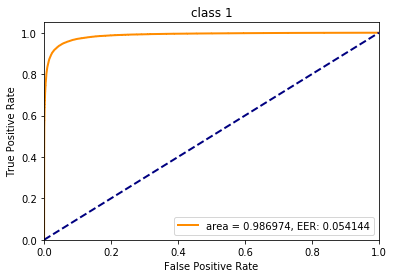

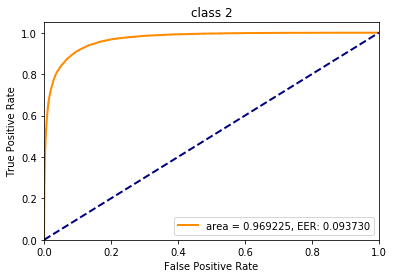

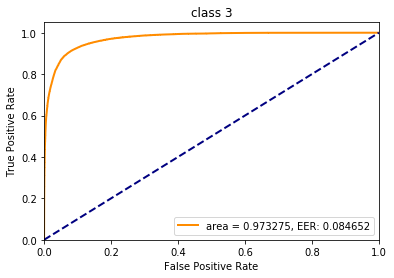

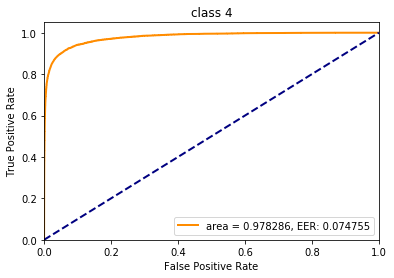

In [71]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(class_num):
#     print(y_true[:, i])
#     print(y_pred[:, i])
    
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
    
#     print(fpr)
#     print(tpr)

    roc_auc[i] = auc(fpr[i], tpr[i])
    eer_threshold = fpr[i][np.argmin(np.abs(fpr[i] + tpr[i] - 1))]
    
    plt.figure()
    lw = 2
    plt.plot(fpr[i], tpr[i], color='darkorange',
             lw=lw, label='area = %0.06f, EER: %0.06f' % (roc_auc[i], eer_threshold))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('class ' + str(i + 1))
    plt.legend(loc="lower right")
    plt.show()

In [72]:
char_all_fpr = np.unique(np.concatenate([fpr[i] for i in range(class_num)]))

In [73]:
char_all_fpr

array([0.00000000e+00, 1.32708718e-05, 1.59360010e-05, ...,
       9.99057768e-01, 9.99084310e-01, 1.00000000e+00])

In [74]:
from scipy import interp

char_mean_tpr = np.zeros_like(char_all_fpr)
for i in range(class_num):
    char_mean_tpr += interp(char_all_fpr, fpr[i], tpr[i])
    
char_mean_tpr /= class_num

/home/taeyong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  """


In [75]:
char_mean_tpr

array([0.08506918, 0.09288403, 0.09786129, ..., 1.        , 1.        ,
       1.        ])

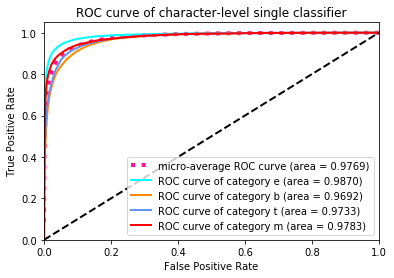

In [76]:
from itertools import cycle

# Plot all ROC curves
plt.figure()
plt.plot(char_all_fpr, char_mean_tpr,
         label='micro-average ROC curve (area = {0:0.4f})'
               ''.format(auc(char_all_fpr, char_mean_tpr)),
         color='deeppink', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'yellow', 'gray', 'blue', 'orange', 'black'])
for i, color in zip(range(class_num), colors):
    category = ''
    if i == 0: category = 'e'
    elif i == 1: category = 'b'
    elif i == 2: category = 't'
    elif i == 3: category = 'm'
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of category {0} (area = {1:0.4f})'
             ''.format(category, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of character-level single classifier')
plt.legend(loc="lower right")
plt.show()

- word-level

In [77]:
y_pred = np.array(load_word_model.predict(X_test_word))

In [78]:
y_true

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [79]:
y_pred

array([[1.9278275e-02, 2.2659609e-02, 9.3044353e-01, 2.7618570e-02],
       [6.2629728e-09, 9.9996185e-01, 3.8035720e-05, 6.4116328e-08],
       [9.1799702e-12, 1.4894830e-06, 9.9999857e-01, 1.7707780e-08],
       ...,
       [9.2224371e-01, 1.8606162e-02, 5.2954923e-02, 6.1952271e-03],
       [9.8925397e-05, 9.9494803e-01, 4.6706423e-03, 2.8244426e-04],
       [3.6781609e-09, 9.9997115e-01, 2.8801278e-05, 7.4034979e-08]],
      dtype=float32)

In [80]:
print(y_pred.shape)
print(y_true.shape)

(84484, 4)
(84484, 4)


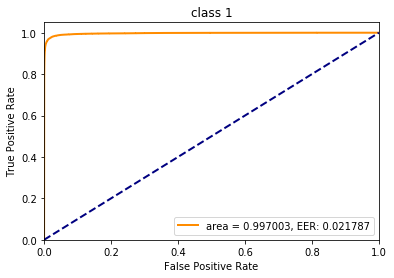

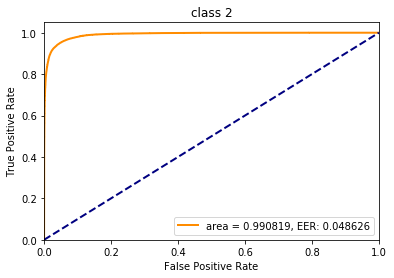

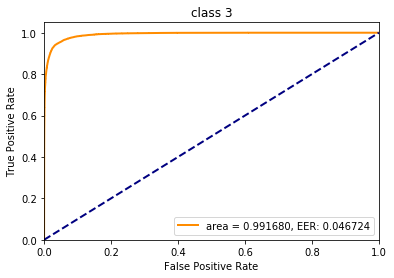

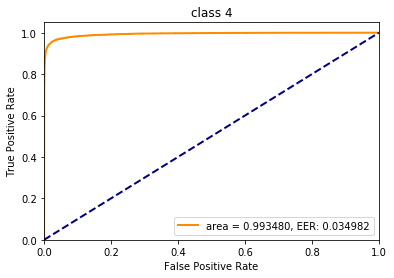

In [81]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(class_num):
#     print(y_true[:, i])
#     print(y_pred[:, i])
    
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
    
#     print(fpr)
#     print(tpr)

    roc_auc[i] = auc(fpr[i], tpr[i])
    eer_threshold = fpr[i][np.argmin(np.abs(fpr[i] + tpr[i] - 1))]
    
    plt.figure()
    lw = 2
    plt.plot(fpr[i], tpr[i], color='darkorange',
             lw=lw, label='area = %0.06f, EER: %0.06f' % (roc_auc[i], eer_threshold))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('class ' + str(i + 1))
    plt.legend(loc="lower right")
    plt.show()

In [82]:
word_all_fpr = np.unique(np.concatenate([fpr[i] for i in range(class_num)]))

In [83]:
word_all_fpr

array([0.00000000e+00, 1.32708718e-05, 1.59360010e-05, ...,
       9.99389149e-01, 9.99426170e-01, 1.00000000e+00])

In [84]:
from scipy import interp

word_mean_tpr = np.zeros_like(word_all_fpr)
for i in range(class_num):
    word_mean_tpr += interp(word_all_fpr, fpr[i], tpr[i])
    
word_mean_tpr /= class_num

/home/taeyong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  """


In [85]:
word_mean_tpr

array([0.06633901, 0.14786572, 0.1545477 , ..., 1.        , 1.        ,
       1.        ])

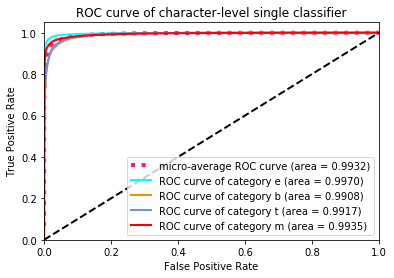

In [86]:
from itertools import cycle

# Plot all ROC curves
plt.figure()
plt.plot(word_all_fpr, word_mean_tpr,
         label='micro-average ROC curve (area = {0:0.4f})'
               ''.format(auc(word_all_fpr, word_mean_tpr)),
         color='deeppink', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'yellow', 'gray', 'blue', 'orange', 'black'])
for i, color in zip(range(class_num), colors):
    category = ''
    if i == 0: category = 'e'
    elif i == 1: category = 'b'
    elif i == 2: category = 't'
    elif i == 3: category = 'm'
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of category {0} (area = {1:0.4f})'
             ''.format(category, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of character-level single classifier')
plt.legend(loc="lower right")
plt.show()

- Ensemble

In [98]:
word_char_model = load_model('word_char_ensemble_model.h5')

In [99]:
y_pred = np.array(word_char_model.predict([X_test_char, X_test_word]))

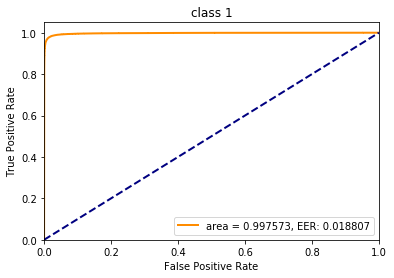

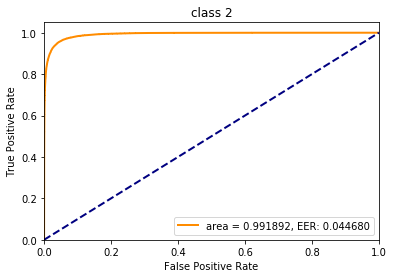

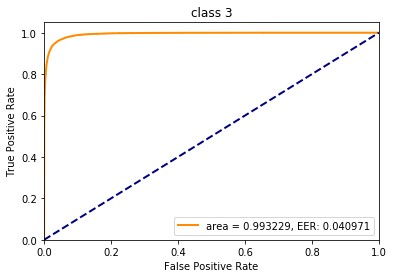

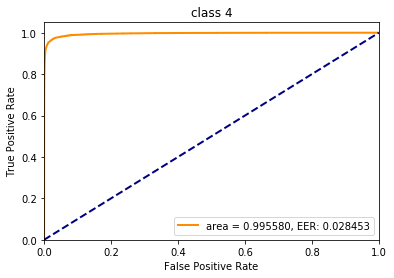

In [100]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(class_num):
#     print(y_true[:, i])
#     print(y_pred[:, i])
    
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
    
#     print(fpr)
#     print(tpr)

    roc_auc[i] = auc(fpr[i], tpr[i])
    eer_threshold = fpr[i][np.argmin(np.abs(fpr[i] + tpr[i] - 1))]
    
    plt.figure()
    lw = 2
    plt.plot(fpr[i], tpr[i], color='darkorange',
             lw=lw, label='area = %0.06f, EER: %0.06f' % (roc_auc[i], eer_threshold))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('class ' + str(i + 1))
    plt.legend(loc="lower right")
    plt.show()

In [101]:
word_char_all_fpr = np.unique(np.concatenate([fpr[i] for i in range(class_num)]))

In [102]:
word_char_all_fpr

array([0.00000000e+00, 1.63065634e-05, 2.65417435e-05, ...,
       9.97649149e-01, 9.97686171e-01, 1.00000000e+00])

In [103]:
from scipy import interp

word_char_mean_tpr = np.zeros_like(word_char_all_fpr)
for i in range(class_num):
    word_char_mean_tpr += interp(word_char_all_fpr, fpr[i], tpr[i])
    
word_char_mean_tpr /= class_num

/home/taeyong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  """


In [104]:
word_char_mean_tpr

array([0.04080487, 0.11919655, 0.16384081, ..., 1.        , 1.        ,
       1.        ])

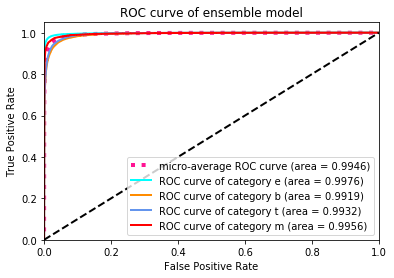

In [105]:
from itertools import cycle

# Plot all ROC curves
plt.figure()
plt.plot(word_char_all_fpr, word_char_mean_tpr,
         label='micro-average ROC curve (area = {0:0.4f})'
               ''.format(auc(word_char_all_fpr, word_char_mean_tpr)),
         color='deeppink', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'yellow', 'gray', 'blue', 'orange', 'black'])
for i, color in zip(range(class_num), colors):
    category = ''
    if i == 0: category = 'e'
    elif i == 1: category = 'b'
    elif i == 2: category = 't'
    elif i == 3: category = 'm'
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of category {0} (area = {1:0.4f})'
             ''.format(category, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of ensemble model')
plt.legend(loc="lower right")
plt.show()

- Comparison with ROC curve of each model

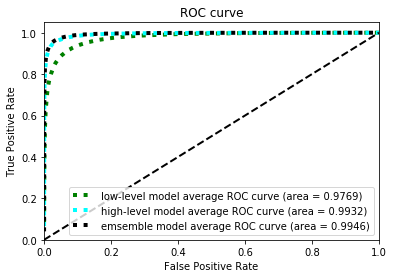

In [106]:
from itertools import cycle

# Plot all ROC curves
plt.figure()
plt.plot(char_all_fpr, char_mean_tpr,
         label='low-level model average ROC curve (area = {0:0.4f})'
               ''.format(auc(char_all_fpr, char_mean_tpr)),
         color='green', linestyle=':', linewidth=4)

plt.plot(word_all_fpr, word_mean_tpr,
         label='high-level model average ROC curve (area = {0:0.4f})'
               ''.format(auc(word_all_fpr, word_mean_tpr)),
         color='aqua', linestyle=':', linewidth=4)

plt.plot(word_char_all_fpr, word_char_mean_tpr,
         label='emsemble model average ROC curve (area = {0:0.4f})'
               ''.format(auc(word_char_all_fpr, word_char_mean_tpr)),
         color='black', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix 

In [107]:
word_char_model = load_model('word_char_ensemble_model.h5')

In [108]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [116]:
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(10,10)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.set(font_scale=2)
    sns.heatmap(cm, annot=annot, annot_kws={"size": 20}, fmt='', ax=ax, cmap=plt.cm.Blues, xticklabels=labels, yticklabels=labels)
    #plt.savefig(filename)
    plt.show()

In [110]:
class_names = ['e', 'b', 't', 'm']

In [111]:
predictions = word_char_model.predict([X_test_char, X_test_word])

In [112]:
predictions.shape

(84484, 4)

In [113]:
np.argmax(y_test, axis=1)

array([2, 1, 2, ..., 0, 1, 1])

In [114]:
np.argmax(predictions, axis=1)

array([2, 1, 2, ..., 0, 1, 1])

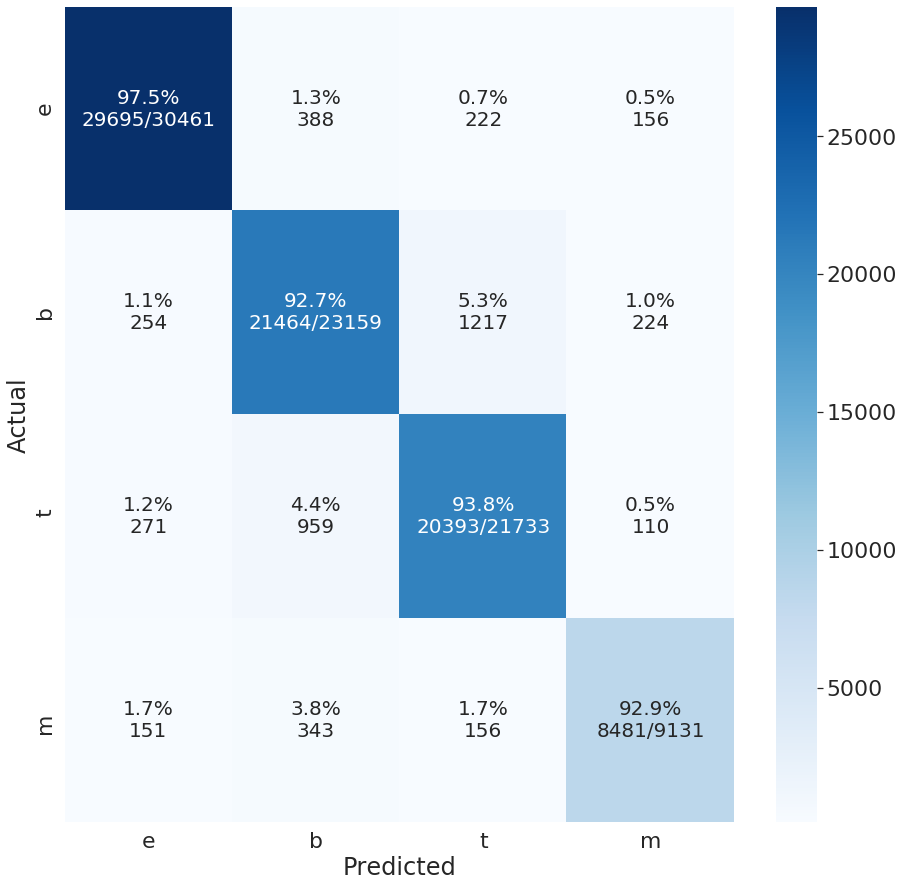

In [119]:
cm_analysis(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1), class_names, ymap=None, figsize=(15,15))